# Project 2 - Linear Regression with ECommerce

## Preparing the data

### Importing Libaries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import collections as cn
import seaborn as sns
sns.set(style="white", color_codes=True)

### Import Data

Creation of a dataframe to store Ecommerce customer data. Check data has been stored correctly and sample the first 5 rows through head(). 

info() to give more infomration on the completness of each attribute and the data type.

describe() to give some profiling of the dataframe, including count, mnean and standard deviation.

In [26]:
customers = pd.read_csv('/Users/thomaswhite/Documents/Data Training/Python Projects/Project 2/EcommerceCustomers.csv')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [27]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [28]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Data Exploration

### Jointplot using Seaborn

Using Seaborn to plot some graphical representations of the data. 

In [29]:
sns.color_palette("magma", as_cmap=True)
sns.set_style('whitegrid')

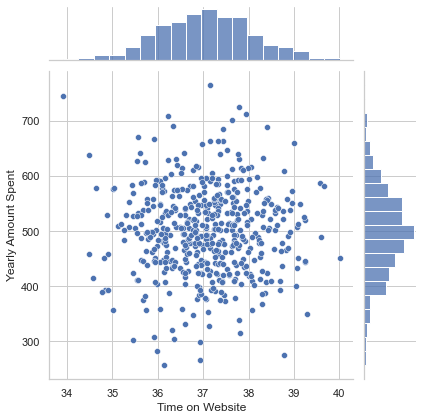

In [30]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

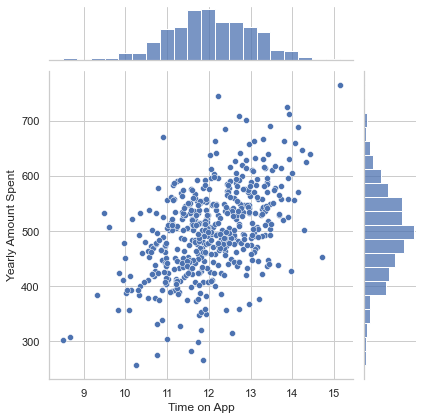

In [31]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=customers)

A correleation can be seen more clearly on the "Time on App" graph, in comparison to the "Time on Website". We can also visualise Time on App/Website against length of subscription.

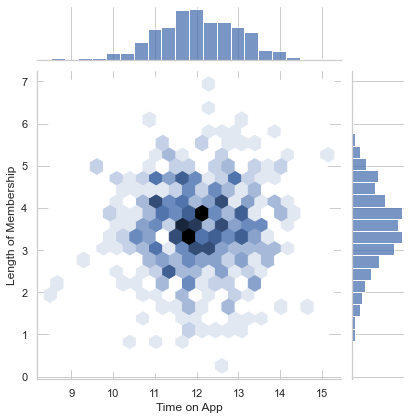

In [32]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

We can explore the relasionships between all the different attributes using seaborn.

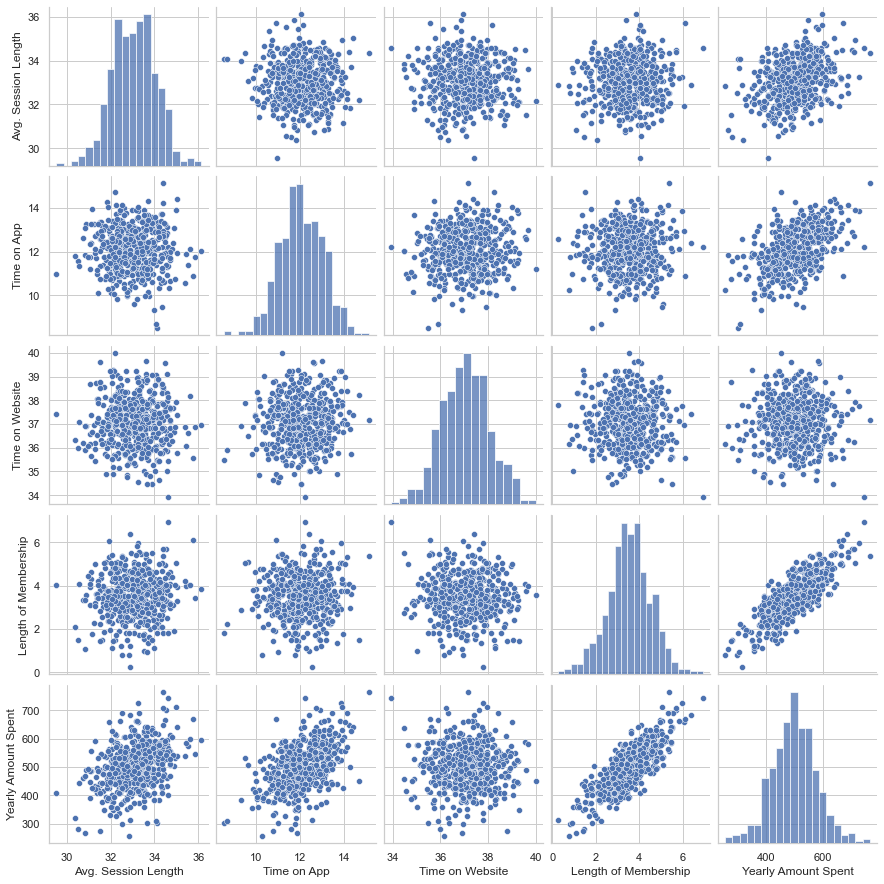

In [33]:
sns.pairplot(customers)

As we can see from the above, some of the correlations are:

   * Length of Membership vs Yearly Amount Spent
   * Time on App vs Yearly Amount Spent
   * Avg. Session Length vs Yearly Amount Spent

### Exploring Correlations

We can explore the strongest correlation in the above by using lmplot.

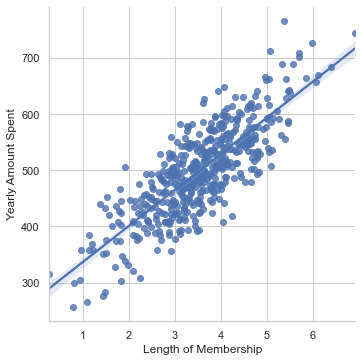

In [34]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

As we can see, the correlation line in this example shows a strong relasionship between yearly amount spent and the length of the membership. This has sense to it as customers that are recurring and have a long membership, are more likely to spend more money over. a year.

### Training and Testing Data

Setting a variable x equal to the quantatitive measures within the data frame and another variable y for the length of the membership.

In [35]:
Y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

Using model_selection.train_test_split from sklearn to split the data into training and testing sets.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### Training the Data

Training the model of our training data by LinearRegression from sklearn.linear_model.

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(X_train,Y_train)

LinearRegression()

In [41]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


### Predicting Data

Using lm.predict() to predict the X_test set of data

In [42]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

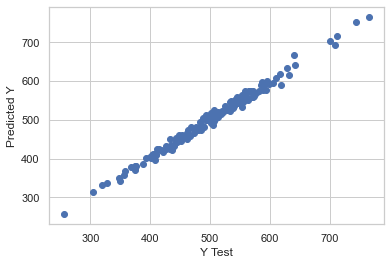

In [43]:
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating The Model

Evaluation of the model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 7.2281486534308295
MSE: 79.8130516509743
RMSE: 8.933815066978626


### Residuals

Plotting a histogram of the residuals and checking the distribution.

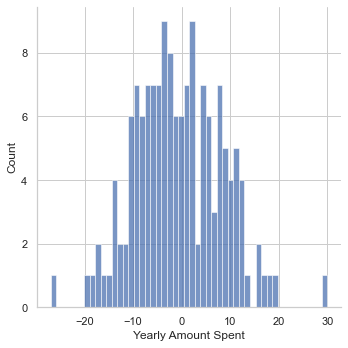

In [45]:
sns.displot((Y_test-predictions),bins=50);


Explaining Variance score

In [46]:
metrics.explained_variance_score(Y_test,predictions)


0.9890771231889607

Around 99% of the behaviour of the model is explained by the variables.

## Conclusion

In [47]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients


,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


From the above data we can make the following deductions:

* Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.98 total dollars spent.
* Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.59 total dollars spent.
* Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.19 total dollars spent.
* Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.27 total dollars spent.